<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [29]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [31]:
## Write your code here
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [32]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [33]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [34]:
#Count the number of duplicate rows in the dataset.
duplicate_count = df[df.duplicated()].shape[0]
print(duplicate_count)

0


In [35]:
#Count the number of duplicate rows in the dataset.
duplicate_count = df[df.duplicated()].shape[1]
print(duplicate_count)

114


In [36]:
df.shape #Shape of the DataFrame

(65437, 114)

In [37]:
df.describe() #Descriptive Statistics of dataframe

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [38]:
## Write your code here
df.columns[df.isnull().any()]   #Find the missing values for all the dataset.

Index(['RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=109)

In [39]:
## Write your code here

# Remove rows with any missing values
df_cleaned_rows = df.dropna()

# Remove columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# Fill missing values with the mode of each column
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check for any remaining missing values
if df.isnull().sum().sum() == 0:
    print("All missing values have been handled.")
else:
    print("There are still missing values in the dataset.")

print(df)

/tmp/ipykernel_688/3970755049.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


All missing values have been handled.
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Em

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [ ]:
# Analyze key columns

# Value counts for 'Employment'
print("Value counts for Employment:")
print(df['Employment'].value_counts())

# Value counts for 'JobSat'
print("\nValue counts for JobSat:")
print(df['JobSat'].value_counts())

# Value counts for 'YearsCodePro'
print("\nValue counts for YearsCodePro:")
print(df['YearsCodePro'].value_counts())

In [40]:
## Write your code here

# Calculate value counts for each specified column
employment_counts = df['Employment'].value_counts()
jobsat_counts = df['JobSat'].value_counts()
yearscodepro_counts = df['YearsCodePro'].value_counts()

# Display the results
print("Employment Distribution:\n", employment_counts)
print("\nJob Satisfaction Distribution:\n", jobsat_counts)
print("\nProfessional Coding Experience Distribution:\n", yearscodepro_counts)

Employment Distribution:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


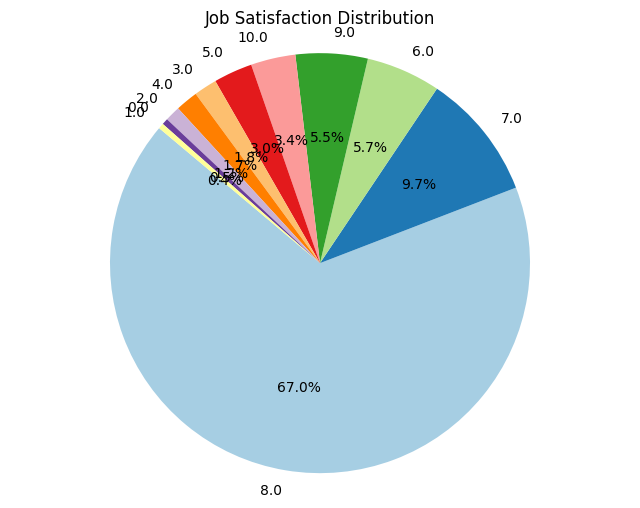

In [41]:
# Calculate value counts for 'JobSat'
jobsat_counts = df['JobSat'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(jobsat_counts, labels=jobsat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Job Satisfaction Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [46]:
# Analyze key columns

# Value counts for 'Employment'
print("Value counts for Employment:")
print(df['Employment'].value_counts())

# Value counts for 'JobSat'
print("\nValue counts for JobSat:")
print(df['JobSat'].value_counts())

# Value counts for 'YearsCodePro'
print("\nValue counts for YearsCodePro:")
print(df['YearsCodePro'].value_counts())

Value counts for Employment:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but lookin

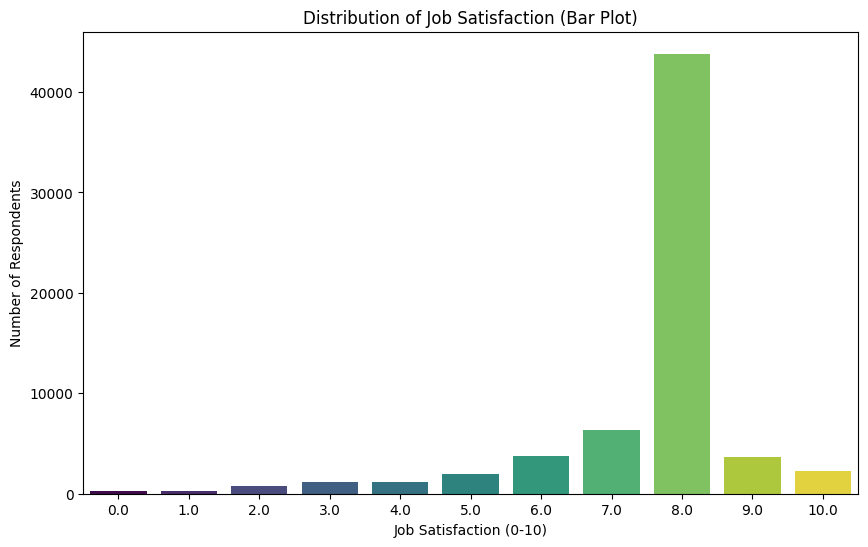

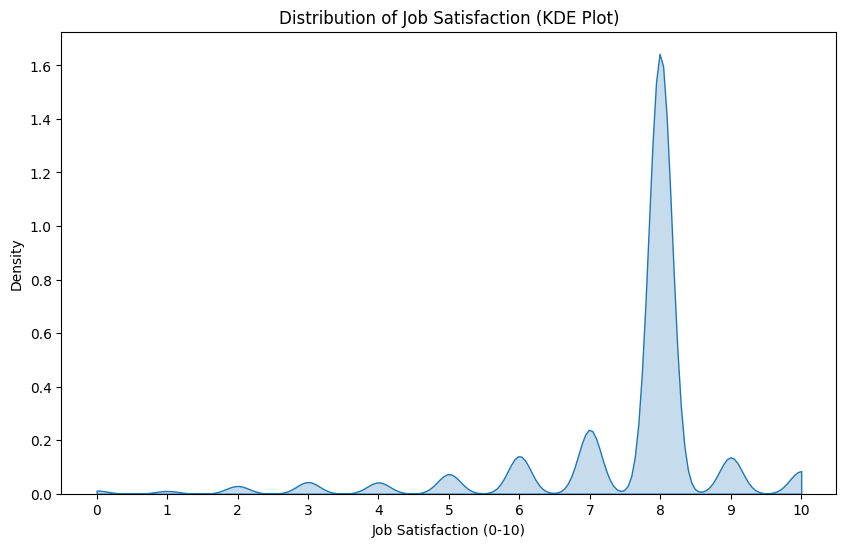

    JobSat  Percentage
0      0.0    0.475266
1      1.0    0.421780
2      2.0    1.179761
3      3.0    1.780338
4      4.0    1.726852
5      5.0    2.989135
6      6.0    5.732231
7      7.0    9.748308
8      8.0   66.965173
9      9.0    5.541208
10    10.0    3.439950


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a bar plot (using 'hue' parameter for clarity)
job_sat_counts = df['JobSat'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=job_sat_counts.index, y=job_sat_counts.values, hue=job_sat_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Job Satisfaction (Bar Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, 11))
plt.show()

# Create a KDE plot (still useful for visualizing the distribution's shape)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, clip=(0,10))
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Density')
plt.xticks(range(0, 11))
plt.show()

#Create a dataframe with the percentage for each JobSat value
job_sat_percentage = (df['JobSat'].value_counts(normalize=True)*100).sort_index()
df_job_sat = pd.DataFrame({'JobSat':job_sat_percentage.index, 'Percentage':job_sat_percentage.values})
print(df_job_sat)

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [56]:
!pip install matplotlib-venn

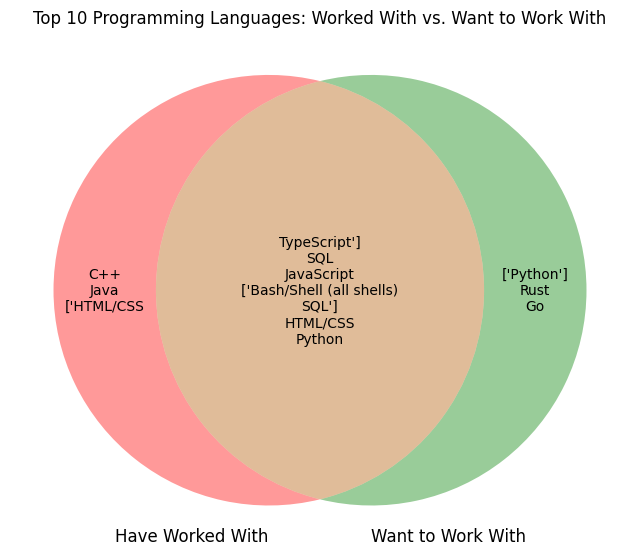

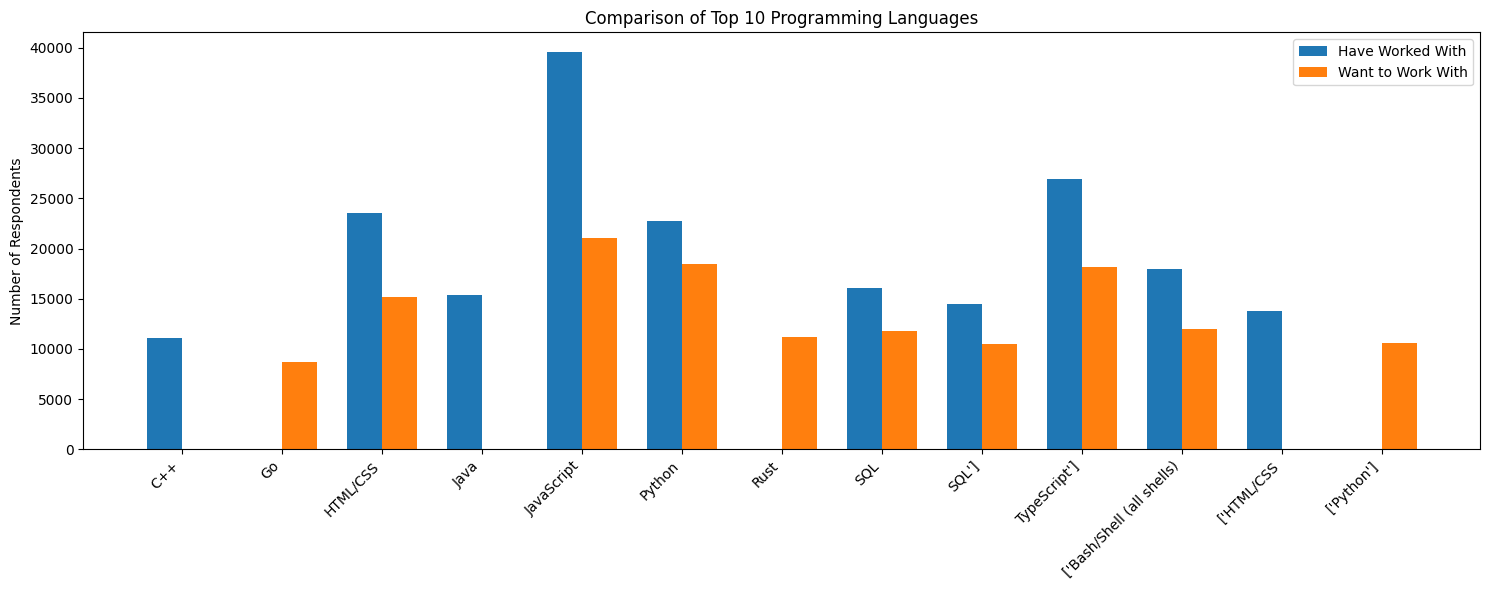

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter

# Handle missing values and ensure all values are strings
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('').astype(str)
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('').astype(str)

# Split the languages and strip whitespace
have_worked = [lang.strip() for langs in df['LanguageHaveWorkedWith'].str.split(';') for lang in langs if lang.strip()]
want_to_work = [lang.strip() for langs in df['LanguageWantToWorkWith'].str.split(';') for lang in langs if lang.strip()]

# Count language occurrences
have_worked_counts = Counter(have_worked)
want_to_work_counts = Counter(want_to_work)

# Get top 10 languages for each
top_n = 10
top_have_worked = dict(have_worked_counts.most_common(top_n))
top_want_to_work = dict(want_to_work_counts.most_common(top_n))

# Venn Diagram (for set comparison)
plt.figure(figsize=(8, 8))
venn = venn2([set(top_have_worked), set(top_want_to_work)], set_labels=('Have Worked With', 'Want to Work With'))
venn.get_label_by_id('100').set_text('\n'.join(set(top_have_worked) - set(top_want_to_work)))
venn.get_label_by_id('010').set_text('\n'.join(set(top_want_to_work) - set(top_have_worked)))
venn.get_label_by_id('110').set_text('\n'.join(set(top_have_worked) & set(top_want_to_work)))
plt.title(f'Top {top_n} Programming Languages: Worked With vs. Want to Work With')
plt.show()

# Grouped Bar Chart (for count comparison)
languages = sorted(set(top_have_worked) | set(top_want_to_work))
have_counts = [top_have_worked.get(lang, 0) for lang in languages]
want_counts = [top_want_to_work.get(lang, 0) for lang in languages]

x = range(len(languages))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar([i - width/2 for i in x], have_counts, width, label='Have Worked With')
rects2 = ax.bar([i + width/2 for i in x], want_counts, width, label='Want to Work With')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Respondents')
ax.set_title(f'Comparison of Top {top_n} Programming Languages')
ax.set_xticks(x)
ax.set_xticklabels(languages, rotation=45, ha='right')
ax.legend()
fig.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


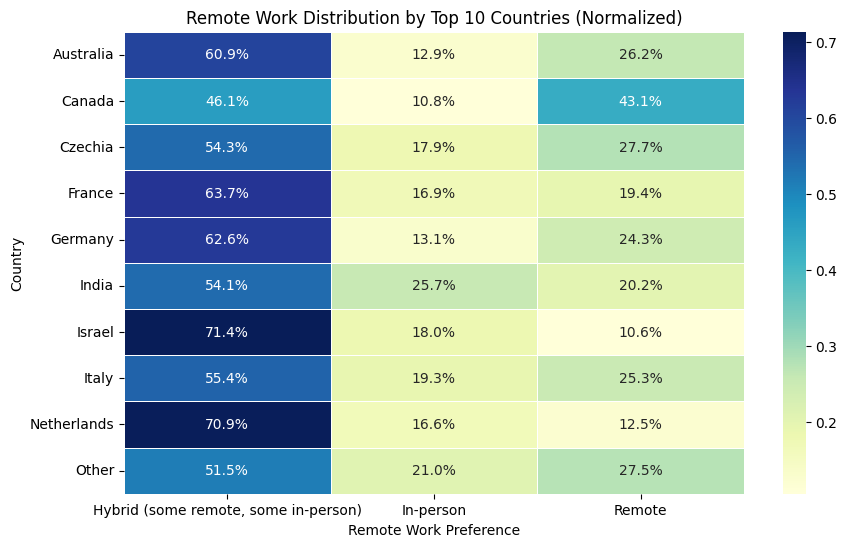

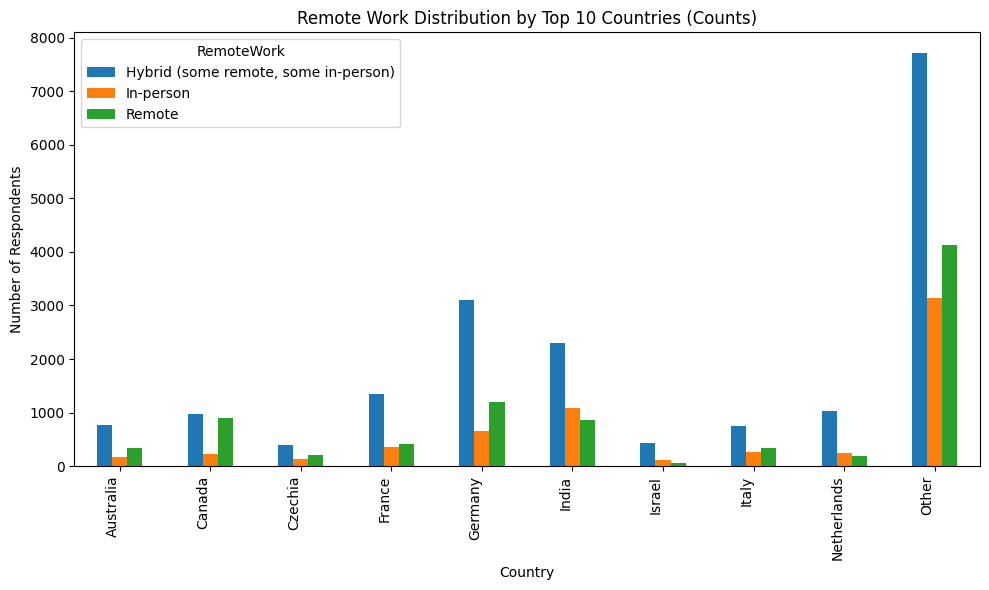

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simplify Country names by mapping
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Germany': 'Germany',
    'Canada': 'Canada',
    'India': 'India',
    'France': 'France',
    'Brazil': 'Brazil',
    'Netherlands': 'Netherlands',
    'Australia': 'Australia',
    'Spain': 'Spain',
    'Sweden': 'Sweden',
    'Poland': 'Poland',
    'Italy': 'Italy',
    'Switzerland': 'Switzerland',
    'Russian Federation': 'Russia',
    'Austria': 'Austria',
    'Israel': 'Israel',
    'Turkey': 'Turkey',
    'Czech Republic': 'Czechia',
    'Ukraine': 'Ukraine'
}
df['Country_Simplified'] = df['Country'].map(country_mapping).fillna('Other')

#Create a crosstab between Country and RemoteWork
remote_work_by_country = pd.crosstab(df['Country_Simplified'], df['RemoteWork'])

# Normalize the cross-tabulation in each Country
remote_work_by_country_normalized = remote_work_by_country.div(remote_work_by_country.sum(axis=1), axis=0)

# Select top countries for visualization
top_n = 10
top_countries = remote_work_by_country_normalized.sum(axis=1).nlargest(top_n).index
remote_work_by_country_normalized_top = remote_work_by_country_normalized.loc[top_countries]

# Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(remote_work_by_country_normalized_top, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=.5)
plt.title(f'Remote Work Distribution by Top {top_n} Countries (Normalized)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Country')
plt.yticks(rotation=0)
plt.show()

#Grouped Bar Chart Visualization
remote_work_by_country_top = remote_work_by_country.loc[top_countries]
remote_work_by_country_top.plot(kind='bar', figsize=(10, 6))
plt.title(f'Remote Work Distribution by Top {top_n} Countries (Counts)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [61]:
## Write your code here
from scipy.stats import pearsonr

In [64]:
# Calculate the Pearson correlation coefficient
correlation_pearson = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
print(f"Pearson correlation coefficient: {correlation_pearson}")

# Calculate the Spearman correlation coefficient
correlation_spearman = df['JobSat'].corr(df['YearsCodePro'], method='spearman')
print(f"Spearman correlation coefficient: {correlation_spearman}")

Pearson correlation coefficient: 0.008821823261863315
Spearman correlation coefficient: -0.02767341762319457


In [65]:
# Ensure YearsCodePro is numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in JobSat or YearsCodePro
df_corr = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Calculate Pearson correlation coefficient
pearson_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='pearson')
print(f'Pearson correlation coefficient: {pearson_corr}')

# Calculate the Spearman correlation coefficient
spearman_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='spearman')
print(f'Spearman correlation coefficient: {spearman_corr}')

Pearson correlation coefficient: 0.008821823261863315
Spearman correlation coefficient: -0.02767341762319457


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


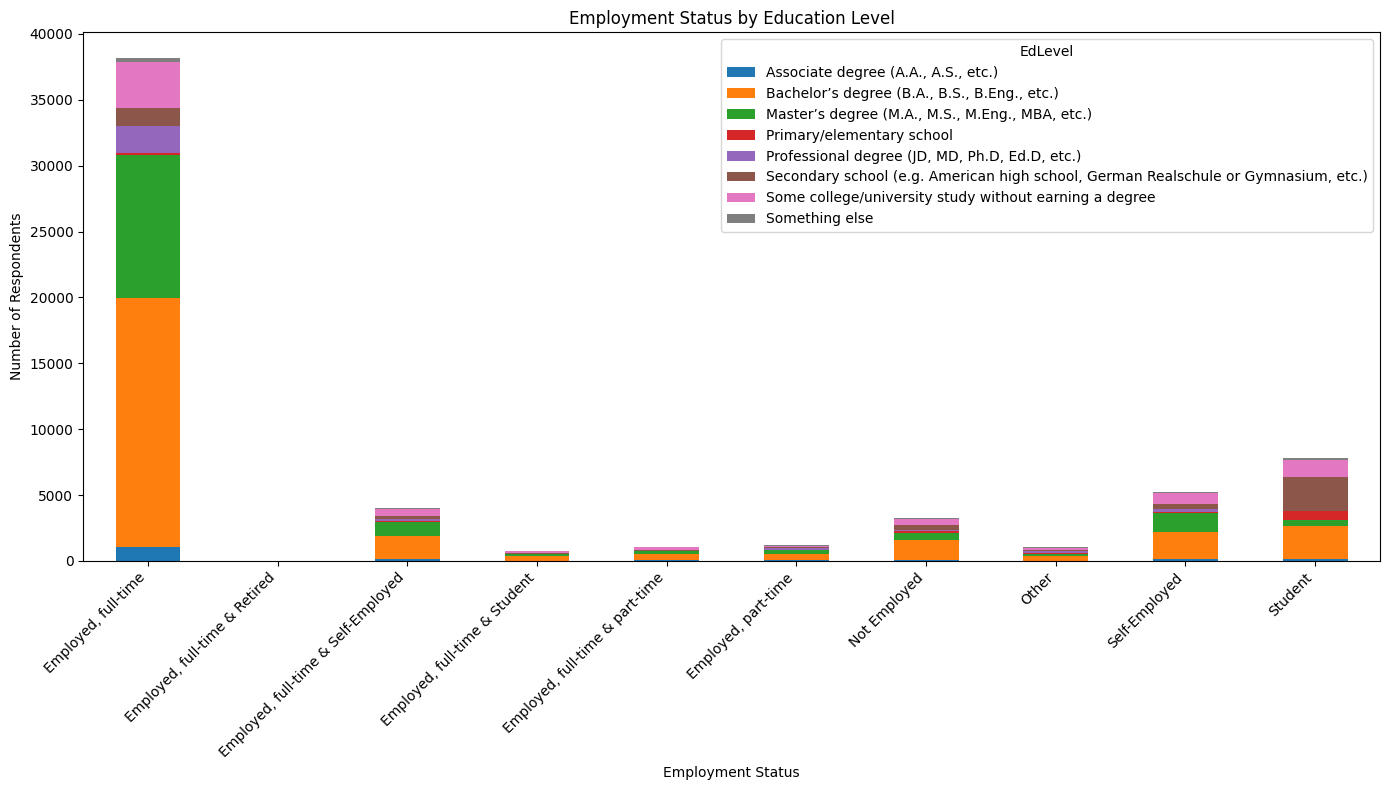

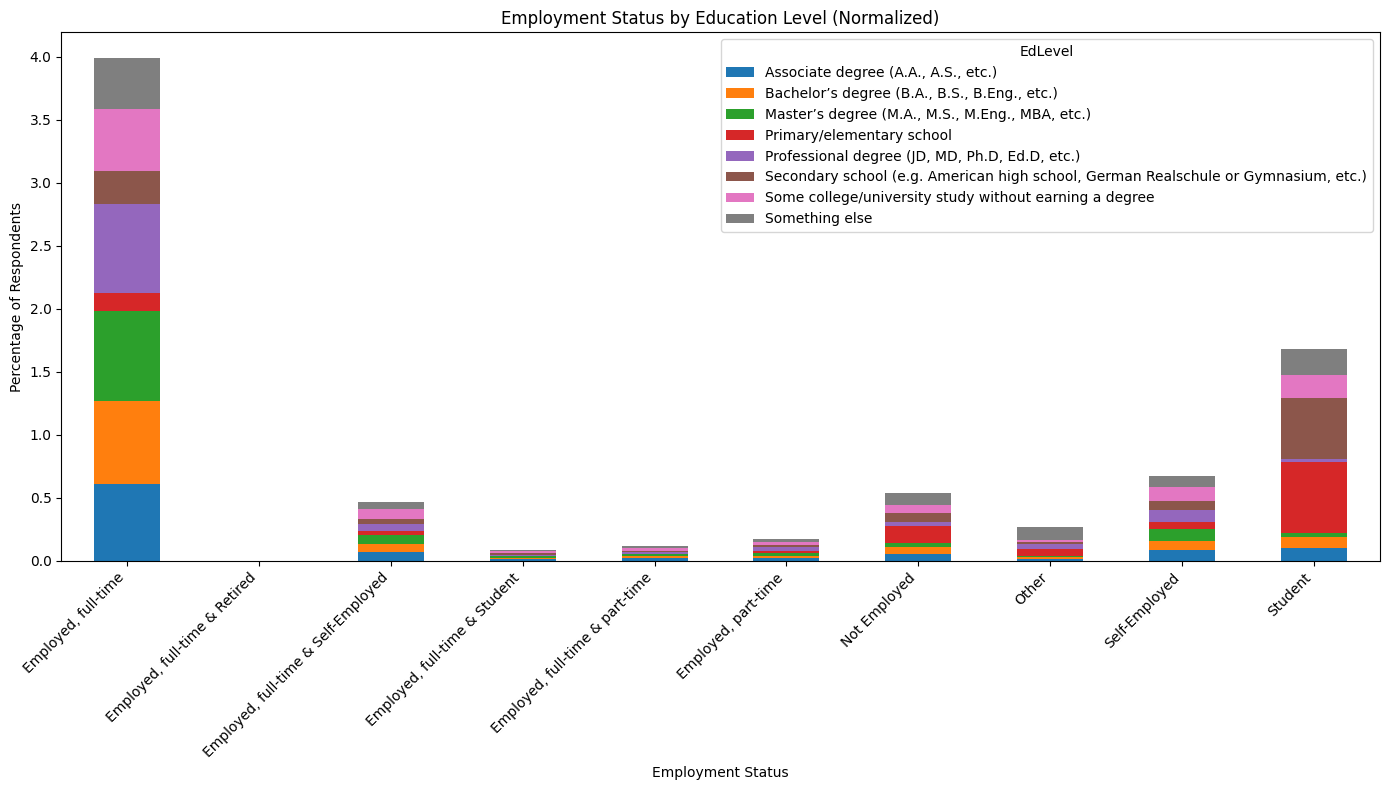

In [66]:
## Write your code here

# Simplify Employment categories
def simplify_employment(employment):
    if "Employed, full-time" in employment:
        if "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
            return "Employed, full-time & Self-Employed"
        elif "part-time" in employment:
          return "Employed, full-time & part-time"
        elif "Student" in employment:
          return "Employed, full-time & Student"
        elif "Retired" in employment:
          return "Employed, full-time & Retired"
        else:
            return "Employed, full-time"
    elif "Student" in employment:
        return "Student"
    elif "Not employed" in employment:
        return "Not Employed"
    elif "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
        return "Self-Employed"
    elif "Employed, part-time" in employment:
        return "Employed, part-time"
    else:
        return "Other"  # Catch-all for less frequent combinations

df['Simplified_Employment'] = df['Employment'].apply(simplify_employment)

# Create the cross-tabulation
employment_edlevel_crosstab = pd.crosstab(df['Simplified_Employment'], df['EdLevel'])

# Create the stacked bar plot
employment_edlevel_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Normalize the cross-tabulation 
employment_edlevel_crosstab_normalized = employment_edlevel_crosstab.div(employment_edlevel_crosstab.sum(axis=0), axis=1)

# Create the stacked bar plot
employment_edlevel_crosstab_normalized.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Employment Status by Education Level (Normalized)')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
